<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictor-variable-rdm" data-toc-modified-id="Predictor-variable-rdm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictor variable rdm</a></span></li><li><span><a href="#Full-feature-model" data-toc-modified-id="Full-feature-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full feature model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional-model" data-toc-modified-id="Dimensional-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dimensional model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Categorical-model" data-toc-modified-id="Categorical-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorical model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Plot-RSA-regression-results-in-Main-Text" data-toc-modified-id="Plot-RSA-regression-results-in-Main-Text-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot RSA regression results in Main Text</a></span><ul class="toc-item"><li><span><a href="#bar-plot" data-toc-modified-id="bar-plot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>bar plot</a></span></li><li><span><a href="#scatter-plot" data-toc-modified-id="scatter-plot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>scatter plot</a></span><ul class="toc-item"><li><span><a href="#full-feature" data-toc-modified-id="full-feature-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>full feature</a></span></li><li><span><a href="#favee" data-toc-modified-id="favee-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>favee</a></span></li><li><span><a href="#hpp" data-toc-modified-id="hpp-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>hpp</a></span></li></ul></li></ul></li><li><span><a href="#Dimensional:-single-dimension" data-toc-modified-id="Dimensional:-single-dimension-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dimensional: single dimension</a></span><ul class="toc-item"><li><span><a href="#Formality" data-toc-modified-id="Formality-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Formality</a></span></li><li><span><a href="#Activeness" data-toc-modified-id="Activeness-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Activeness</a></span></li><li><span><a href="#Valence" data-toc-modified-id="Valence-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Valence</a></span></li><li><span><a href="#Exchange" data-toc-modified-id="Exchange-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Exchange</a></span></li><li><span><a href="#Equality" data-toc-modified-id="Equality-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Equality</a></span></li></ul></li><li><span><a href="#Categorical:-single-category" data-toc-modified-id="Categorical:-single-category-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Categorical: single category</a></span><ul class="toc-item"><li><span><a href="#Hostile" data-toc-modified-id="Hostile-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Hostile</a></span></li><li><span><a href="#Private" data-toc-modified-id="Private-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Private</a></span></li><li><span><a href="#Public" data-toc-modified-id="Public-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Public</a></span></li></ul></li></ul></div>

In [2]:
options(warn=-1)
library(openxlsx)
library(tidyverse)
library(reshape)

library(ggplot2)
library(ggpubr)
library(RColorBrewer)
library(corrplot)
library(corrr)

library(DescTools) #Fisher Z
library(rstatix)

In [4]:
regions_order = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

fix_region = function(df){
    regions = rownames(df)
    regions = str_replace(regions,'United States','USA')
    regions = str_replace(regions,'United Kingdom','UK')
    regions = str_replace(regions,'China','CHN')
    regions = str_replace(regions,'South_africa','South Africa')
    regions = str_replace(regions,'Spain','Spanish')
    regions = str_replace(regions,'HK','HK(region)')
    regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
    regions = str_replace(regions,'Hong Kong','HK(region)')
    regions = str_replace(regions,'Spanish','Spain')
    regions = str_replace(regions,'Russian Federation','Russia')
    regions = str_replace(regions,'Russian','Russia')
    regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')
    
    rownames(df) = regions
    colnames(df) = regions
    
    df = df[regions_order,regions_order]
    return(df)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# Predictor variable rdm

In [5]:
# Language
Lexical = read.csv('../Cultural_RDM/rdm/Lexical_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Lexical = fix_region(Lexical)

# Personality
Agreeableness = read.csv('../Cultural_RDM/rdm/Agreeableness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Agreeableness = fix_region(Agreeableness)
Conscientiousness = read.csv('../Cultural_RDM/rdm/Conscientiousness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Conscientiousness = fix_region(Conscientiousness)
Extraversion = read.csv('../Cultural_RDM/rdm/Extraversion_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Extraversion = fix_region(Extraversion)
Neuroticism = read.csv('../Cultural_RDM/rdm/Neuroticism_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Neuroticism = fix_region(Neuroticism)
Openness = read.csv('../Cultural_RDM/rdm/Openness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Openness = fix_region(Openness)
personality_all = read.csv('../Cultural_RDM/rdm/personality_all_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
personality_all = fix_region(personality_all)

# Socioecological
Climatic_demands = read.csv('../Cultural_RDM/rdm/Climatic_demands_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Climatic_demands = fix_region(Climatic_demands)
Coordinate = read.csv('../Cultural_RDM/rdm/Coordinate_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Coordinate = fix_region(Coordinate)
subsistence = read.csv('../Cultural_RDM/rdm/subsistence_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
subsistence = fix_region(subsistence)
disease = read.csv('../Cultural_RDM/rdm/disease_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
disease = fix_region(disease)

# Modernization
urban = read.csv('../Cultural_RDM/rdm/urban_rdm.csv', row.names=1, encoding = "UTF-8")
urban = fix_region(urban)
wealth = read.csv('../Cultural_RDM/rdm/wealth_rdm.csv', row.names=1, encoding = "UTF-8")
wealth = fix_region(wealth)
edu = read.csv('../Cultural_RDM/rdm/edu_rdm.csv', row.names=1, encoding = "UTF-8")
edu = fix_region(edu)
modern = read.csv('../Cultural_RDM/rdm/modern_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
modern = fix_region(modern)

# Cultural value
## Hofstede 6D
power = read.csv('../Cultural_RDM/rdm/power_rdm.csv', row.names=1, encoding = "UTF-8")
power = fix_region(power)
Individualism = read.csv('../Cultural_RDM/rdm/Individualism_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Individualism = fix_region(Individualism)
Masculine = read.csv('../Cultural_RDM/rdm/Masculine_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Masculine = fix_region(Masculine)
Uncertainty_Avoidance = read.csv('../Cultural_RDM/rdm/Uncertainty_Avoidance_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Uncertainty_Avoidance = fix_region(Uncertainty_Avoidance)
Long_Term_Orientation = read.csv('../Cultural_RDM/rdm/Long_Term_Orientation_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Long_Term_Orientation = fix_region(Long_Term_Orientation)
Indulgence = read.csv('../Cultural_RDM/rdm/Indulgence_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Indulgence = fix_region(Indulgence)
Hofstede_6D = read.csv('../Cultural_RDM/rdm/Hofstede_6D_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Hofstede_6D = fix_region(Hofstede_6D)

# Gene
new_gendist_weighted = read.csv('../Cultural_RDM/rdm/new_gendist_weighted_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
new_gendist_weighted = fix_region(new_gendist_weighted)

# Religion
reldist_weighted_WCD_form = read.csv('../Cultural_RDM/rdm/reldist_weighted_WCD_form_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
reldist_weighted_WCD_form = fix_region(reldist_weighted_WCD_form)
religion_per = read.csv('../Cultural_RDM/rdm/religion_percentage_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
religion_per = fix_region(religion_per)

# Political
idealogy = read.csv('../Cultural_RDM/rdm/political_idealogy_rdm_range.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
idealogy = fix_region(idealogy)

In [6]:
# Demographics
gender = read.csv('../DataCleanPCA/output_data/rdm/gender_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
gender = fix_region(gender)
age = read.csv('../DataCleanPCA/output_data/rdm/age_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
age = fix_region(age)
education_ind = read.csv('../DataCleanPCA/output_data/rdm/education_ind_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
education_ind = fix_region(education_ind)
demographics = read.csv('../DataCleanPCA/output_data/rdm/demographics_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
demographics = fix_region(demographics)

# check size
check_size = read.csv('../DataCleanPCA/output_data/rdm/check_size_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
check_size = fix_region(check_size)

In [7]:
# get rdms of predicators 
variables_names <- c('Lexical',# Language
                     'personality_all',# Personality
                     'Coordinate','Climatic_demands','subsistence','disease',# Socioecological
                     'modern',# Modernization
                     'Hofstede_6D',# Cultural value
                     'new_gendist_weighted',# Gene
                     'religion_per',#'reldist_weighted_WCD_form',# Religion
                     'idealogy',# Political
                     'demographics'# Demographics
                     #'check_size'
                    )

variables <- list()
for(i in c(1:length(variables_names))){
  variables[[i]] = get(variables_names[i])
}

In [8]:
permutation_result = function(culture_regress_standard_model){
    # create permutation matrix
    nperm <- 10000
    permf <- matrix(NA,nperm)
    permr2 <- matrix(NA,nperm)
    # contain beta
    permt <- matrix(NA,nperm,length(variables_names)) # 12variables
    colnames(permt) <- variables_names
    # caculate proportation of beta or F value over the model results
    permf_pvals <- NA 
    permt_pvals <- NA
    tstats = NA

    # the model results
    fstats <- culture_regress_standard_model$fstatistic[[1]]
    for (i in 1:length(variables_names)){
      tstats[i] <- culture_regress_standard_model$coefficients[1+i,1]
    }
    r2stats <- culture_regress_standard_model$r.squared
    print(paste('fstats:',fstats))
    #print('tstats:')
    #tstats
    print(paste('r2stats:',r2stats))

    set.seed(2)
    for (i in 1:nperm){
      psel <- sample(19) # permuted index, total 19 regions
      x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x[psel,psel]))) # generate permuted predictors
      rfit <- lm(scale(model_rdm_array)~scale(x)) # fit permuted model
      srfit <- summary(rfit)
      permf[i,1] <- srfit$fstatistic[1] # F-stat
      permr2[i,1] <- srfit$r.squared # R-squared
      #permf[,i] <- unlist(lapply(srfit,function(x) x$fstatistic[1])) # F-stat
      #permr2[,i] <- unlist(lapply(srfit,function(x) x$r.squared)) # R-squared
      for (j in 1:length(variables_names)){
        permt[i,j] <- srfit$coefficients[1+j,1] # each var t-stat
      }
      #print(i)
    }
    print(i)

    # F statistics
    permf_pvals <- mean(permf[,1] >= fstats)
    print(paste('permf_pvals',permf_pvals))

    # Each variable's regression
    for (i in 1:length(variables_names)){
      permt_pvals[i] <- mean(permt[,i] >= tstats[i])
    }

    permt_pvals <- as.data.frame(t(permt_pvals)) 

    colnames(permt_pvals) <- variables_names
    return(permt_pvals)
} 

# Full feature model

## regression coefficient

In [9]:
model_rdm = read.csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/raw_33d.csv')
full_feature_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66326 -0.45139  0.02644  0.47571  2.16121 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.163e-17  5.067e-02   0.000 1.000000    
scale(x)Lexical               1.560e-02  6.604e-02   0.236 0.813570    
scale(x)personality_all       1.311e-01  5.753e-02   2.279 0.023976 *  
scale(x)Coordinate           -2.108e-01  5.916e-02  -3.564 0.000484 ***
scale(x)Climatic_demands      1.646e-01  5.662e-02   2.907 0.004169 ** 
scale(x)subsistence          -7.884e-02  5.900e-02  -1.336 0.183387    
scale(x)disease               4.410e-03  5.847e-02   0.075 0.939967    
scale(x)modern                3.514e-01  5.521e-02   6.366 2.02e-09 ***
scale(x)Hofstede_6D          -1.506e-01  6.141e-02  -2.453 0.015267 *  
scale(x)new_gendist_weighted -5.634e-02  6.567e-02  -0.858 0.392255    
scale(x)religion_per          5.57

## permutation

In [11]:
p_value = permutation_result(full_feature_regression)
p_value
write.csv(p_value,'output_data/p_value/raw_33d.csv')

[1] "fstats: 19.1055361861989"
[1] "r2stats: 0.592012149691308"
[1] 10000
[1] "permf_pvals 2e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4706,0.2108,0.924,0.1806,0.6973,0.479,0.0169,0.8088,0.5643,0.002,0.8144,0.5899


# Dimensional model

## regression coefficient

In [12]:
model_rdm = read.csv('output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/favee_33d.csv')
dimensional_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16280 -0.44314  0.07424  0.46755  1.76725 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -5.344e-17  5.261e-02   0.000  1.00000    
scale(x)Lexical               2.929e-03  6.858e-02   0.043  0.96599    
scale(x)personality_all       1.651e-01  5.974e-02   2.763  0.00641 ** 
scale(x)Coordinate           -2.032e-01  6.144e-02  -3.308  0.00116 ** 
scale(x)Climatic_demands      1.798e-01  5.879e-02   3.058  0.00262 ** 
scale(x)subsistence          -2.847e-02  6.127e-02  -0.465  0.64281    
scale(x)disease              -3.595e-02  6.071e-02  -0.592  0.55458    
scale(x)modern                2.703e-01  5.733e-02   4.714 5.30e-06 ***
scale(x)Hofstede_6D          -2.000e-01  6.377e-02  -3.136  0.00204 ** 
scale(x)new_gendist_weighted -1.678e-01  6.820e-02  -2.461  0.01492 *  
scale(x)religion_per          5.33

## permutation

In [13]:
p_value = permutation_result(dimensional_regression)
p_value
write.csv(p_value,'output_data/p_value/favee_33d.csv')

[1] "fstats: 16.7615548352288"
[1] "r2stats: 0.560058499773106"
[1] 10000
[1] "permf_pvals 5e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,0.1928,0.908,0.1901,0.5625,0.6467,0.0457,0.8799,0.7536,0.0031,0.8308,0.4801


# Categorical model

## regression coefficient

In [26]:
model_rdm = read.csv('output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/hpp_33d.csv')
categorical_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03743 -0.62209  0.08118  0.53465  2.47872 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.538e-16  6.616e-02   0.000 1.000000    
scale(x)Lexical               3.740e-02  8.623e-02   0.434 0.665085    
scale(x)personality_all       6.604e-02  7.511e-02   0.879 0.380653    
scale(x)Coordinate           -1.895e-01  7.725e-02  -2.453 0.015239 *  
scale(x)Climatic_demands      1.294e-01  7.393e-02   1.751 0.081889 .  
scale(x)subsistence          -3.496e-03  7.704e-02  -0.045 0.963857    
scale(x)disease               7.672e-03  7.634e-02   0.100 0.920081    
scale(x)modern                2.628e-01  7.209e-02   3.646 0.000361 ***
scale(x)Hofstede_6D          -7.236e-02  8.019e-02  -0.902 0.368231    
scale(x)new_gendist_weighted -3.420e-02  8.575e-02  -0.399 0.690521    
scale(x)religion_per          4.01

## permutation

In [15]:
p_value = permutation_result(categorical_regression)
p_value
write.csv(p_value,'output_data/p_value/hpp_33d.csv')

[1] "fstats: 5.76281136163539"
[1] "r2stats: 0.304435830349851"
[1] 10000
[1] "permf_pvals 0.0823"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.385,0.2893,0.9176,0.1757,0.4906,0.4534,0.0345,0.685,0.5329,0.0105,0.681,0.9951


# Plot RSA regression results in Main Text

## bar plot

In [3]:
full_feature_beta = read.csv('output_data/beta/raw_33d.csv',row.names=1)
full_feature_beta = full_feature_beta['Estimate']

favee_beta = read.csv('output_data/beta/favee_33d.csv',row.names=1)
favee_beta = favee_beta['Estimate']

hpp_beta = read.csv('output_data/beta/hpp_33d.csv',row.names=1)
hpp_beta = hpp_beta['Estimate']

regression_results = cbind(full_feature_beta,favee_beta,hpp_beta)
regression_results = regression_results[-c(1),]
rownames(regression_results) = c('Language','Personality','Geography',
           'Climates','Subsistence','Disease','Modernization','Hofstede6D',
           'Genetics','Religion','Politics','Demographics')
colnames(regression_results) = c('Full model','Dimension','Category')

regression_results['Predictor'] = rownames(regression_results)
regression_results
regression_results_melt = melt(regression_results,id.vars = 'Predictor')
regression_results_melt$Predictor = factor(regression_results_melt$Predictor,
levels = c('Language','Personality','Geography','Climates','Subsistence','Disease',
           'Modernization','Hofstede6D','Genetics','Religion','Politics',
           'Demographics'))

,Full model,Dimension,Category,Predictor
,<dbl>,<dbl>,<dbl>,<chr>
Language,0.015599639,0.002929035,0.037398588,Language
Personality,0.131134267,0.165056231,0.066037099,Personality
Geography,-0.210844416,-0.203245959,-0.189518791,Geography
Climates,0.164608282,0.179762163,0.129442251,Climates
Subsistence,-0.078840127,-0.028468816,-0.003496460,Subsistence
Disease,0.004410237,-0.035953333,0.007671648,Disease
Modernization,0.351449911,0.270251479,0.262843002,Modernization
Hofstede6D,-0.150628996,-0.199993365,-0.072359820,Hofstede6D
Genetics,-0.056339730,-0.167842899,-0.034203540,Genetics


In [4]:
raw_data = read.csv('../LOOCV/output_data/raw33d_loocv.csv',row.names=1)
raw_data_mean = mean(raw_data[,1])

favee = read.csv('../LOOCV/output_data/favee33d_loocv.csv',row.names=1)
favee_mean = mean(favee[,1])

hpp = read.csv('../LOOCV/output_data/hpp33d_loocv.csv',row.names=1)
hpp_mean = mean(hpp[,1])

png 
  2

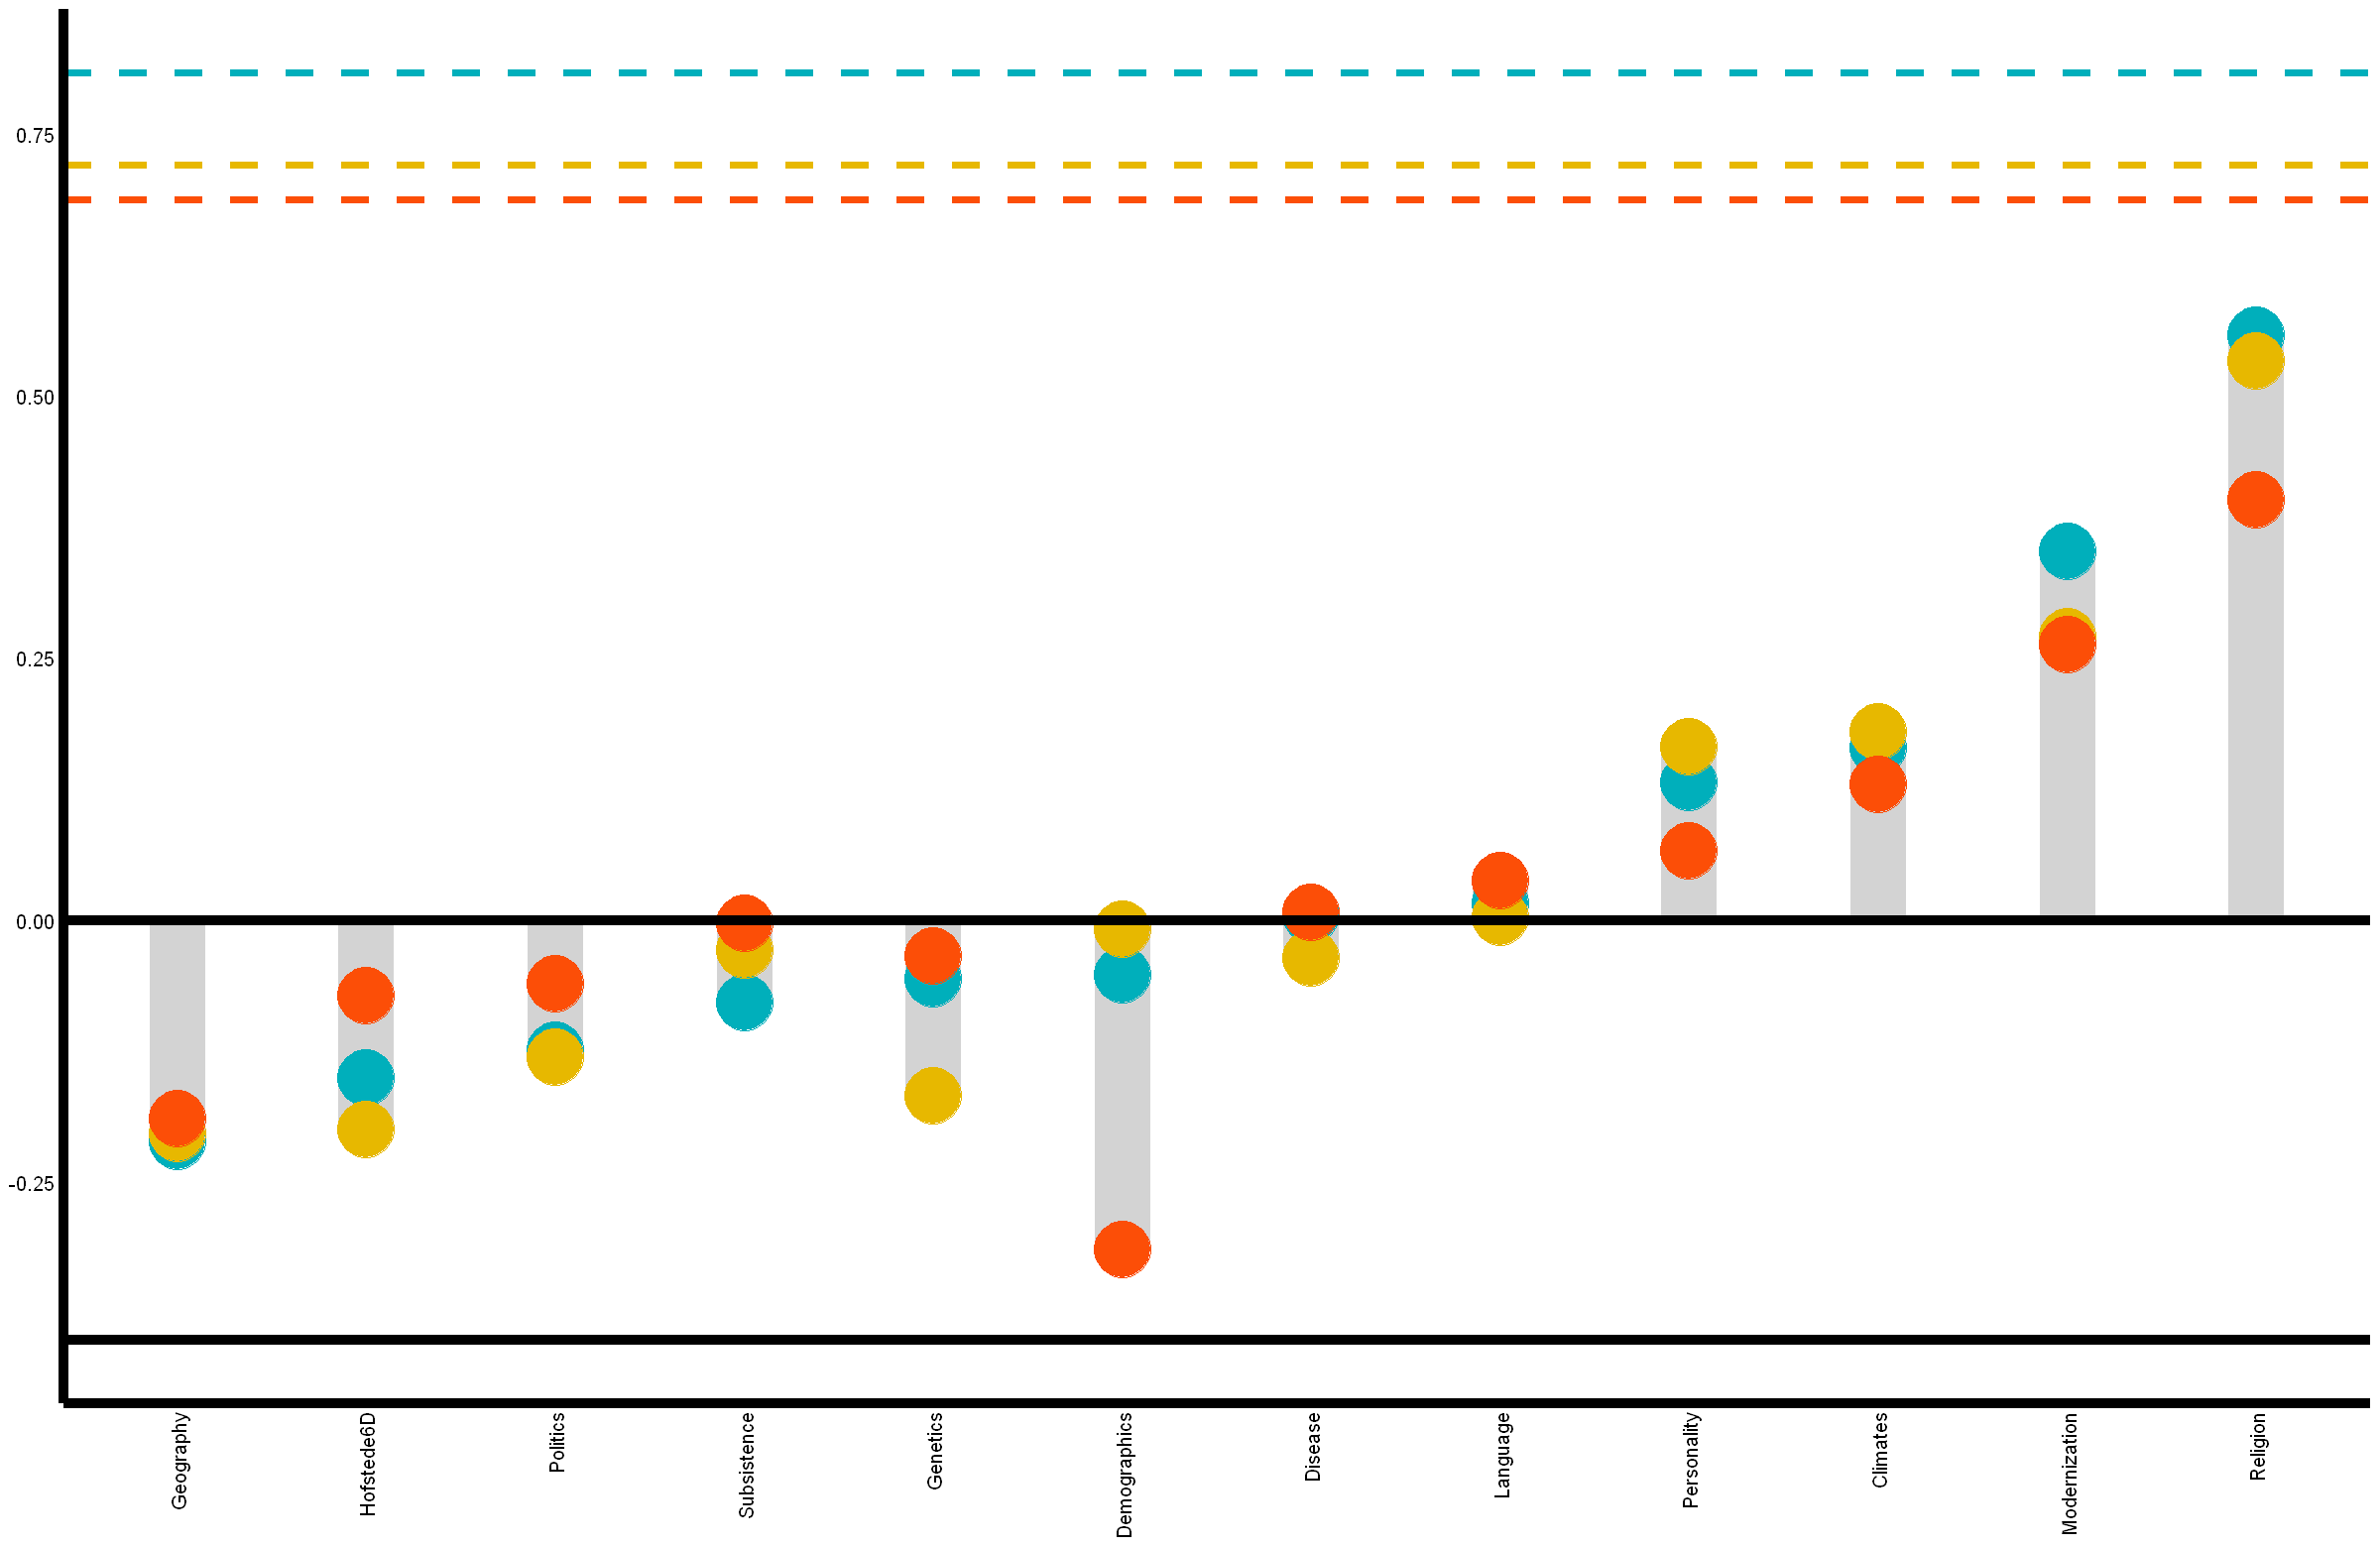

In [5]:
options(repr.plot.width=20,repr.plot.height=13)
ggdotchart(regression_results_melt, x = "Predictor", y = "value",group = "variable",
           #shape = 25,
           size = 16,
           color = "variable",                                
           palette = c("#00AFBB", "#E7B800", "#FC4E07"), 
           sorting = "ascending",                        
           add = "segments",                             
           ggtheme = theme_pubr()
) + 
geom_hline(aes(yintercept=0),size=3)+
geom_hline(aes(yintercept=-0.4),size=3)+
geom_hline(aes(yintercept=raw_data_mean),size=2,linetype="dashed",colour="#00AFBB")+
geom_hline(aes(yintercept=favee_mean),size=2,linetype="dashed",colour="#E7B800")+
geom_hline(aes(yintercept=hpp_mean),size=2,linetype="dashed",colour="#FC4E07")+
scale_y_continuous(breaks=seq(-0.5,1,0.25))+

theme(axis.title=element_blank(),
      #axis.text=element_text(color='white'),axis.ticks = element_blank(),
      #axis.text.x=element_text(color='white'),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.text = element_text(size = 25,face='bold'),
      legend.key.size = unit(3,'cm'),
      legend.position = 'none')

#################################################################
png("../output_graph/regression/RSA_regression.png", bg="transparent",
    family = 'sans',units='in',width=20,height=13,res=300)
ggdotchart(regression_results_melt, x = "Predictor", y = "value",group = "variable",
           #shape = 25,
           size = 16,
           color = "variable",                                
           palette = c("#00AFBB", "#E7B800", "#FC4E07"), 
           sorting = "ascending",                        
           add = "segments",                             
           ggtheme = theme_pubr()
) + 
geom_hline(aes(yintercept=0),size=3)+
geom_hline(aes(yintercept=-0.4),size=3)+
geom_hline(aes(yintercept=raw_data_mean),size=2,linetype="dashed",colour="#00AFBB")+
geom_hline(aes(yintercept=favee_mean),size=2,linetype="dashed",colour="#E7B800")+
geom_hline(aes(yintercept=hpp_mean),size=2,linetype="dashed",colour="#FC4E07")+
scale_y_continuous(breaks=seq(-0.5,1,0.25))+

theme(axis.title=element_blank(),
      axis.text=element_text(color='white'),axis.ticks = element_blank(),
      axis.line.x=element_line(linetype=1,color="white",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.text = element_text(size = 25,face='bold'),
      legend.key.size = unit(3,'cm'),
      legend.position = 'none')
dev.off()

## scatter plot

In [6]:
fix_region = function(df){
    regions = rownames(df)
    regions = str_replace(regions,'United States','USA')
    regions = str_replace(regions,'United Kingdom','UK')
    regions = str_replace(regions,'China','CHN')
    regions = str_replace(regions,'South_africa','South Africa')
    regions = str_replace(regions,'Spain','Spanish')
    regions = str_replace(regions,'HK','HK(region)')
    regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
    regions = str_replace(regions,'Hong Kong','HK(region)')
    regions = str_replace(regions,'Spanish','Spain')
    regions = str_replace(regions,'Russian Federation','Russia')
    regions = str_replace(regions,'Russian','Russia')
    regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')
    
    rownames(df) = regions
    colnames(df) = regions
    
    df = df[regions_selected,regions_selected]
    return(df)
}

In [7]:
raw33d_dissim_dist = read.csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                             row.names=1)
regions_selected = rownames(raw33d_dissim_dist)
raw_rdm = raw33d_dissim_dist[lower.tri(raw33d_dissim_dist,diag = FALSE)]
favee_dissim_dist = read.csv('output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                             row.names=1)
favee_rdm = favee_dissim_dist[lower.tri(favee_dissim_dist,diag = FALSE)]
hpp_dissim_dist = read.csv('output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                             row.names=1)
hpp_rdm = hpp_dissim_dist[lower.tri(hpp_dissim_dist,diag = FALSE)]


religion = read.csv('../Cultural_RDM/rdm/religion_percentage_rdm.csv',
                     row.names=1, encoding = "UTF-8",check.names = FALSE)
religion = fix_region(religion)
religion_rdm = religion[lower.tri(religion,diag = FALSE)]

modern = read.csv('../Cultural_RDM/rdm/modern_dist.csv', 
                  row.names=1, encoding = "UTF-8",check.names = FALSE)
modern = fix_region(modern)
modern_rdm = modern[lower.tri(modern,diag = FALSE)]

### full feature

In [8]:
raw_religion = data.frame(cbind(scale(raw_rdm),scale(religion_rdm)))
raw_religion['pre'] = 'religion'
raw_modern = data.frame(cbind(scale(raw_rdm),scale(modern_rdm)))
raw_modern['pre'] = 'modern'
raw_resutls = rbind(raw_religion,raw_modern)
colnames(raw_resutls) = c('model_rdm','pre_rdm','pre')
raw_resutls$pre = factor(raw_resutls$pre,levels=c('modern','religion'))

# results of correlation is the same as regression
summary(lm(scale(raw_rdm)~scale(modern_rdm)))
summary(lm(scale(raw_rdm)~scale(religion_rdm)))


Call:
lm(formula = scale(raw_rdm) ~ scale(modern_rdm))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31280 -0.70645 -0.07477  0.65156  3.04552 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.321e-16  6.926e-02   0.000        1    
scale(modern_rdm) 4.295e-01  6.946e-02   6.184 4.56e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9057 on 169 degrees of freedom
Multiple R-squared:  0.1845,	Adjusted R-squared:  0.1797 
F-statistic: 38.24 on 1 and 169 DF,  p-value: 4.556e-09



Call:
lm(formula = scale(raw_rdm) ~ scale(religion_rdm))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83794 -0.68998  0.05443  0.47180  2.10597 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.203e-16  6.358e-02    0.00        1    
scale(religion_rdm) 5.593e-01  6.377e-02    8.77 1.86e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8314 on 169 degrees of freedom
Multiple R-squared:  0.3128,	Adjusted R-squared:  0.3087 
F-statistic: 76.92 on 1 and 169 DF,  p-value: 1.856e-15


png 
  2

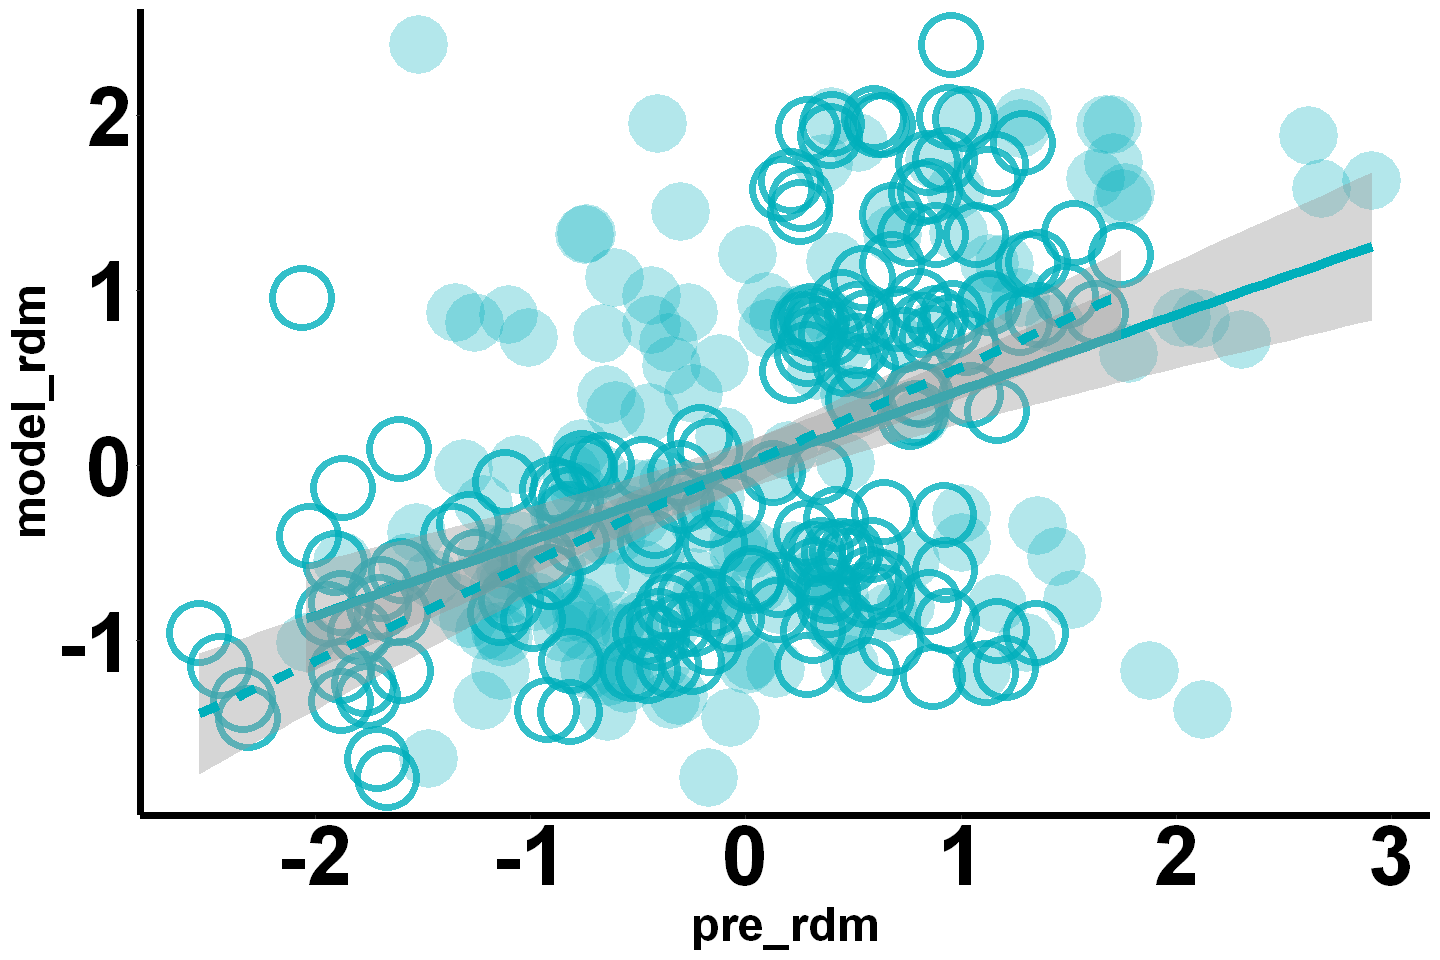

In [9]:
options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(raw_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#00AFBB',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+
geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#00AFBB") +

theme_classic() + 
theme(#axis.text.x=element_blank(),axis.title.x =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none') 

png("../output_graph/regression/full_feature_correlation.png", bg="transparent",
    family = 'sans',units='in',width=12,height=8,res=300)
ggplot(raw_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#00AFBB',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+
geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#00AFBB") +

theme_classic() + 
theme(#axis.text.x=element_blank(),
    axis.title =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    #axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    #axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none') 
dev.off()

### favee

In [10]:
favee_religion = data.frame(cbind(scale(favee_rdm),scale(religion_rdm)))
favee_religion['pre'] = 'religion'
favee_modern = data.frame(cbind(scale(favee_rdm),scale(modern_rdm)))
favee_modern['pre'] = 'modern'
favee_resutls = rbind(favee_religion,favee_modern)
colnames(favee_resutls) = c('model_rdm','pre_rdm','pre')
favee_resutls$pre = factor(favee_resutls$pre,levels=c('modern','religion'))

# results of correlation is the same as regression
summary(lm(scale(favee_rdm)~scale(modern_rdm)))
summary(lm(scale(favee_rdm)~scale(religion_rdm)))


Call:
lm(formula = scale(favee_rdm) ~ scale(modern_rdm))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22099 -0.73633  0.03004  0.80814  2.60364 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.719e-18  7.205e-02   0.000        1    
scale(modern_rdm)  3.430e-01  7.226e-02   4.747 4.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9421 on 169 degrees of freedom
Multiple R-squared:  0.1176,	Adjusted R-squared:  0.1124 
F-statistic: 22.53 on 1 and 169 DF,  p-value: 4.385e-06



Call:
lm(formula = scale(favee_rdm) ~ scale(religion_rdm))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8168 -0.6851  0.1301  0.6692  2.3948 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.680e-17  6.592e-02   0.000        1    
scale(religion_rdm)  5.112e-01  6.611e-02   7.732 9.08e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.862 on 169 degrees of freedom
Multiple R-squared:  0.2613,	Adjusted R-squared:  0.2569 
F-statistic: 59.78 on 1 and 169 DF,  p-value: 9.076e-13


png 
  2

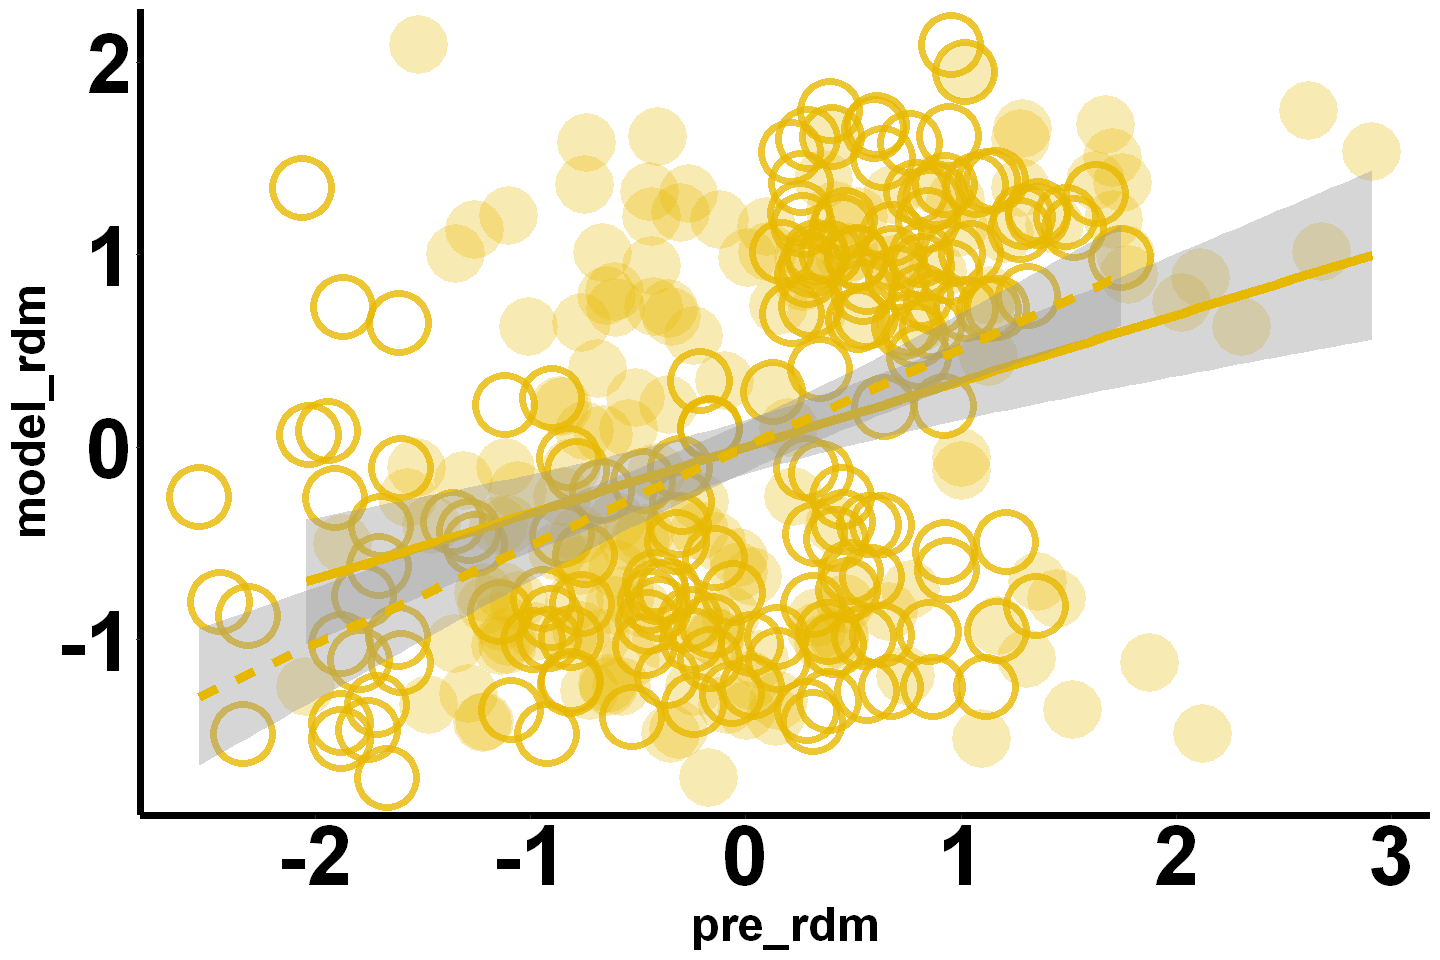

In [11]:
options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(favee_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#E7B800',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+
geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#E7B800") +

theme_classic() + 
theme(#axis.text.x=element_blank(),axis.title.x =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none') 

png("../output_graph/regression/favee_correlation.png", bg="transparent",
    family = 'sans',units='in',width=12,height=8,res=300)
ggplot(favee_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#E7B800',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+
geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#E7B800") +

theme_classic() + 
theme(#axis.text.x=element_blank(),
    axis.title =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    #axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    #axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none') 
dev.off()

### hpp

In [12]:
hpp_religion = data.frame(cbind(scale(hpp_rdm),scale(religion_rdm)))
hpp_religion['pre'] = 'religion'
hpp_modern = data.frame(cbind(scale(hpp_rdm),scale(modern_rdm)))
hpp_modern['pre'] = 'modern'
hpp_resutls = rbind(hpp_religion,hpp_modern)
colnames(hpp_resutls) = c('model_rdm','pre_rdm','pre')
hpp_resutls$pre = factor(hpp_resutls$pre,levels=c('modern','religion'))

summary(lm(scale(hpp_rdm)~scale(modern_rdm)))
summary(lm(scale(hpp_rdm)~scale(religion_rdm)))


Call:
lm(formula = scale(hpp_rdm) ~ scale(modern_rdm))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08057 -0.72525 -0.01331  0.74462  2.94606 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.503e-16  7.349e-02   0.000 1.000000    
scale(modern_rdm) 2.863e-01  7.370e-02   3.884 0.000147 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.961 on 169 degrees of freedom
Multiple R-squared:  0.08195,	Adjusted R-squared:  0.07652 
F-statistic: 15.09 on 1 and 169 DF,  p-value: 0.0001472



Call:
lm(formula = scale(hpp_rdm) ~ scale(religion_rdm))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.54112 -0.65128  0.00955  0.67098  2.19945 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.478e-16  7.246e-02   0.000        1    
scale(religion_rdm) 3.278e-01  7.267e-02   4.511  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9475 on 169 degrees of freedom
Multiple R-squared:  0.1075,	Adjusted R-squared:  0.1022 
F-statistic: 20.35 on 1 and 169 DF,  p-value: 1.201e-05


png 
  2

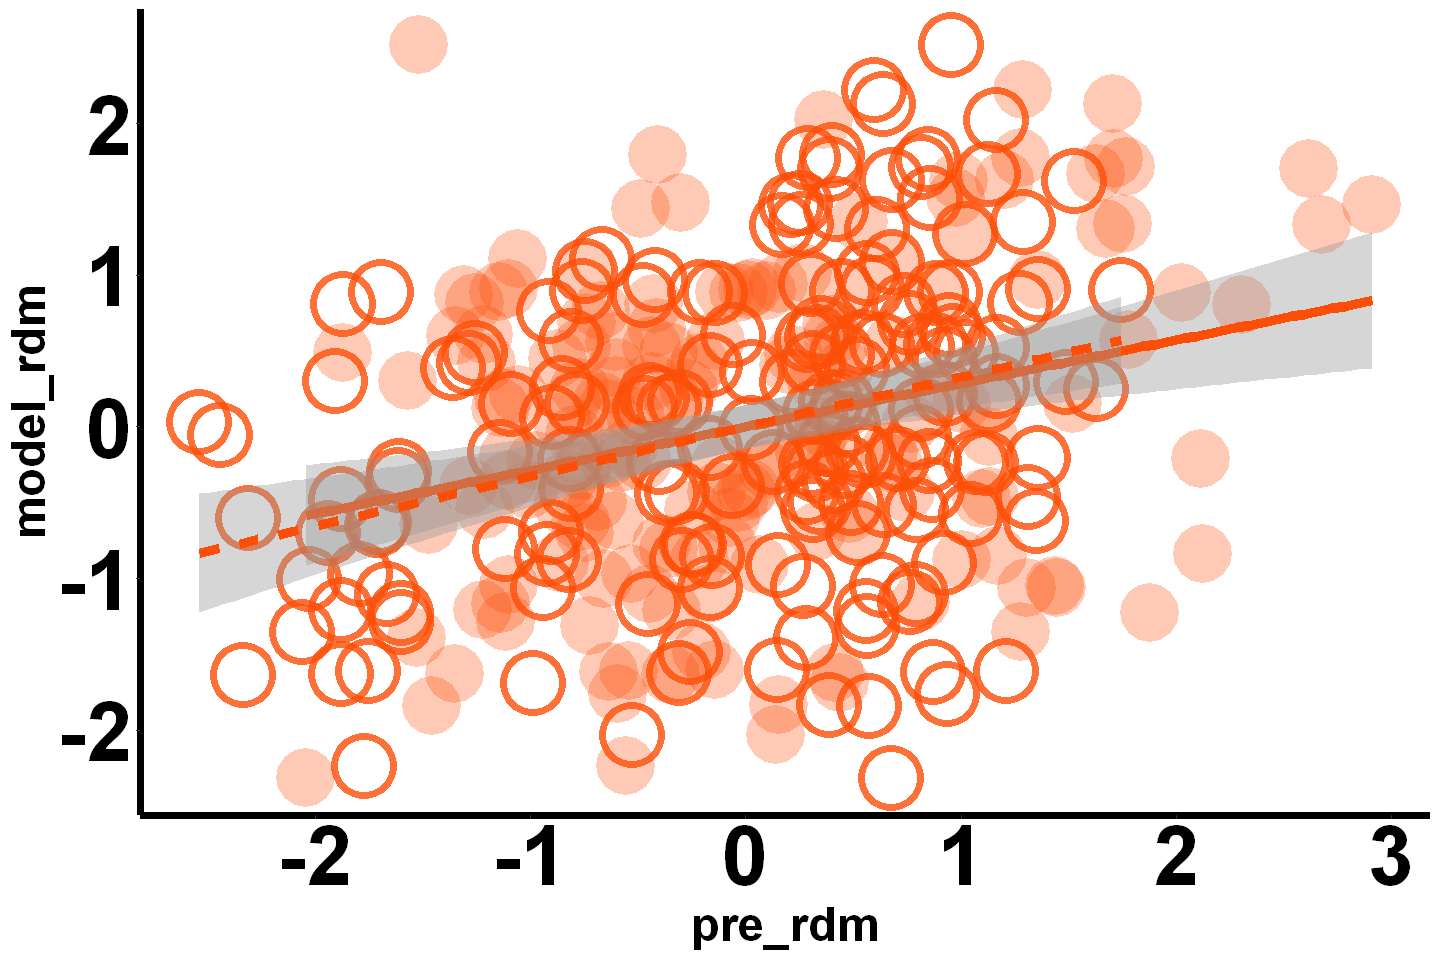

In [13]:
options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(hpp_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#FC4E07',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+

geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#FC4E07") +

theme_classic() +  
theme(#axis.text.x=element_blank(),axis.title.x =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none')  

png("../output_graph/regression/hpp_correlation.png", bg="transparent",
    family = 'sans',units='in',width=12,height=8,res=300)
ggplot(hpp_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
geom_point(aes(alpha=pre),size=15,colour='#FC4E07',stroke=3)+
scale_shape_manual(values=c('religion'=1,'modern'=16))+
scale_alpha_manual(values=c('religion'=0.8,'modern'=0.3))+
geom_smooth(aes(linetype = pre),
            method = 'lm', size=3,formula = y ~ x,color = "#FC4E07") +

theme_classic() + 
theme(#axis.text.x=element_blank(),
    axis.title =element_blank(),
    #axis.ticks.x = element_blank(),
    axis.text.y=element_text(size=50,face='bold',color="black"),
    #axis.title.y=element_text(size=28,face='bold',color="black"),
    axis.text.x=element_text(size=50,face='bold',color="black"),
    #axis.title.x=element_text(size=28,face='bold',color="black"),
    axis.line.x=element_line(linetype=1,color="black",size=2),
    axis.line.y=element_line(linetype=1,color="black",size=2),
    legend.position = 'none') 
dev.off()

legend

In [14]:
# options(repr.plot.width = 12,repr.plot.height = 8)
# ggplot(hpp_resutls,aes(x=pre_rdm,y=model_rdm,group=pre,shape=pre))+
# geom_point(size=6,colour='black',stroke=1)+
# scale_shape_manual(values=c('religion'=1,'modern'=16))+
# geom_smooth(aes(linetype = pre),
#             method = 'lm', size=3,formula = y ~ x,color = "black") +

# theme_classic() +  
# theme(#axis.text.x=element_blank(),axis.title.x =element_blank(),
#     #axis.ticks.x = element_blank(),
#     axis.text.y=element_text(size=28,face='bold',color="black"),
#     axis.title.y=element_text(size=28,face='bold',color="black"),
#     axis.text.x=element_text(size=28,face='bold',color="black"),
#     axis.title.x=element_text(size=28,face='bold',color="black"),
#     axis.line.x=element_line(linetype=1,color="black",size=2),
#     axis.line.y=element_line(linetype=1,color="black",size=2),
#     legend.position = 'top',legend.text = element_blank(),
#     legend.key.size = unit(5,'cm')) 

# Dimensional: single dimension

## Formality

In [16]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/formality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/formality_33d.csv')
formality_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(formality_regression)
p_value
write.csv(p_value,'output_data/p_value/formality_33d.csv')


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79131 -0.56677  0.05342  0.52369  2.76072 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.553e-16  6.203e-02   0.000  1.00000    
scale(x)Lexical               1.024e-01  8.085e-02   1.266  0.20736    
scale(x)personality_all      -8.729e-03  7.043e-02  -0.124  0.90152    
scale(x)Coordinate           -2.431e-01  7.243e-02  -3.356  0.00099 ***
scale(x)Climatic_demands      1.355e-01  6.932e-02   1.954  0.05245 .  
scale(x)subsistence          -6.430e-02  7.224e-02  -0.890  0.37477    
scale(x)disease              -1.547e-01  7.158e-02  -2.161  0.03221 *  
scale(x)modern                1.391e-01  6.760e-02   2.058  0.04121 *  
scale(x)Hofstede_6D          -1.579e-01  7.519e-02  -2.100  0.03733 *  
scale(x)new_gendist_weighted -7.335e-02  8.041e-02  -0.912  0.36300    
scale(x)religion_per          4.86

[1] "fstats: 8.36274682155775"
[1] "r2stats: 0.38843356444112"
[1] 10000
[1] "permf_pvals 0.0228"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2249,0.482,0.9577,0.221,0.6731,0.9593,0.1755,0.8401,0.6081,0.0026,0.7823,0.6525


## Activeness

In [17]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/activeness_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/activeness_33d.csv')
activeness_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(activeness_regression)
p_value
write.csv(p_value,'output_data/p_value/activeness_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45421 -0.42202  0.07348  0.54072  2.10451 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.947e-16  6.597e-02   0.000 1.000000    
scale(x)Lexical               1.368e-01  8.598e-02   1.591 0.113651    
scale(x)personality_all       8.081e-02  7.490e-02   1.079 0.282274    
scale(x)Coordinate           -1.692e-01  7.703e-02  -2.197 0.029472 *  
scale(x)Climatic_demands      7.666e-02  7.372e-02   1.040 0.299959    
scale(x)subsistence          -3.708e-02  7.682e-02  -0.483 0.629954    
scale(x)disease              -6.948e-02  7.613e-02  -0.913 0.362793    
scale(x)modern                2.481e-01  7.189e-02   3.451 0.000717 ***
scale(x)Hofstede_6D          -1.515e-01  7.996e-02  -1.895 0.059967 .  
scale(x)new_gendist_weighted  2.451e-02  8.551e-02   0.287 0.774760    
scale(x)religion_per          4.07

[1] "fstats: 5.87008648295697"
[1] "r2stats: 0.30835544469268"
[1] 10000
[1] "permf_pvals 0.0486"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1478,0.3121,0.8831,0.309,0.5926,0.7766,0.0355,0.8484,0.424,0.0091,0.8684,0.635


## Valence

In [18]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/valence_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/valence_33d.csv')
valence_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(valence_regression)
p_value
write.csv(p_value,'output_data/p_value/valence_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93075 -0.56866  0.05395  0.57633  1.90885 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.256e-16  6.421e-02   0.000 1.000000    
scale(x)Lexical              -5.648e-02  8.370e-02  -0.675 0.500769    
scale(x)personality_all       8.912e-02  7.291e-02   1.222 0.223408    
scale(x)Coordinate           -1.256e-01  7.498e-02  -1.675 0.095889 .  
scale(x)Climatic_demands      1.998e-01  7.176e-02   2.785 0.006013 ** 
scale(x)subsistence          -1.987e-01  7.478e-02  -2.657 0.008686 ** 
scale(x)disease              -9.554e-02  7.410e-02  -1.289 0.199177    
scale(x)modern                3.011e-01  6.997e-02   4.303 2.95e-05 ***
scale(x)Hofstede_6D          -2.173e-01  7.784e-02  -2.792 0.005891 ** 
scale(x)new_gendist_weighted  1.299e-01  8.323e-02   1.560 0.120700    
scale(x)religion_per          3.27

[1] "fstats: 6.92457252168341"
[1] "r2stats: 0.344656317948702"
[1] 10000
[1] "permf_pvals 0.1257"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6589,0.288,0.7613,0.1641,0.9307,0.85,0.0304,0.9134,0.2561,0.0501,0.7553,0.3265


## Exchange

In [19]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/exchange_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/exchange_33d.csv')
exchange_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(exchange_regression)
p_value
write.csv(p_value,'output_data/p_value/exchange_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3518 -0.5769 -0.1145  0.5953  2.1194 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.197e-16  7.017e-02   0.000 1.000000    
scale(x)Lexical               2.975e-02  9.146e-02   0.325 0.745391    
scale(x)personality_all      -9.116e-02  7.967e-02  -1.144 0.254274    
scale(x)Coordinate           -1.076e-01  8.193e-02  -1.313 0.191021    
scale(x)Climatic_demands      9.389e-03  7.841e-02   0.120 0.904834    
scale(x)subsistence           4.387e-02  8.171e-02   0.537 0.592052    
scale(x)disease               1.146e-02  8.097e-02   0.142 0.887616    
scale(x)modern                2.664e-01  7.646e-02   3.484 0.000638 ***
scale(x)Hofstede_6D          -6.299e-02  8.505e-02  -0.741 0.460003    
scale(x)new_gendist_weighted -1.731e-01  9.095e-02  -1.903 0.058888 .  
scale(x)religion_per          2.829e-01  9.6

[1] "fstats: 3.66060595538956"
[1] "r2stats: 0.217540063538963"
[1] 10000
[1] "permf_pvals 0.5232"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4231,0.6623,0.7337,0.3937,0.3607,0.4455,0.0426,0.6507,0.7799,0.0665,0.9629,0.5692


## Equality

In [20]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/equality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/equality_33d.csv')
equality_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(equality_regression)
p_value
write.csv(p_value,'output_data/p_value/equality_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19539 -0.45032  0.05788  0.48195  1.40426 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.340e-17  5.544e-02   0.000 1.000000    
scale(x)Lexical              -7.621e-02  7.226e-02  -1.055 0.293243    
scale(x)personality_all       2.699e-01  6.295e-02   4.288 3.13e-05 ***
scale(x)Coordinate           -1.996e-01  6.474e-02  -3.083 0.002415 ** 
scale(x)Climatic_demands      8.735e-02  6.195e-02   1.410 0.160546    
scale(x)subsistence          -2.590e-02  6.456e-02  -0.401 0.688834    
scale(x)disease              -2.031e-02  6.398e-02  -0.318 0.751275    
scale(x)modern                2.361e-01  6.042e-02   3.907 0.000138 ***
scale(x)Hofstede_6D          -1.664e-01  6.720e-02  -2.476 0.014344 *  
scale(x)new_gendist_weighted -1.418e-01  7.186e-02  -1.974 0.050175 .  
scale(x)religion_per          4.99

[1] "fstats: 13.7845516253067"
[1] "r2stats: 0.511463024638557"
[1] 10000
[1] "permf_pvals 0.0015"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7124,0.0777,0.9145,0.2869,0.5485,0.5809,0.062,0.8489,0.7309,0.0036,0.8436,0.309


# Categorical: single category

## Hostile

In [21]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/hostile_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/hostile_33d.csv')
hostile_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(hostile_regression)
p_value
write.csv(p_value,'output_data/p_value/hostile_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08683 -0.60390 -0.00433  0.71401  1.86056 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -8.290e-17  7.247e-02   0.000  1.00000   
scale(x)Lexical               2.086e-01  9.446e-02   2.209  0.02863 * 
scale(x)personality_all       5.594e-03  8.229e-02   0.068  0.94589   
scale(x)Coordinate           -8.153e-02  8.462e-02  -0.963  0.33679   
scale(x)Climatic_demands      3.213e-02  8.098e-02   0.397  0.69211   
scale(x)subsistence           2.295e-01  8.439e-02   2.720  0.00727 **
scale(x)disease               1.206e-01  8.363e-02   1.443  0.15113   
scale(x)modern                1.104e-01  7.897e-02   1.398  0.16418   
scale(x)Hofstede_6D          -3.533e-03  8.784e-02  -0.040  0.96797   
scale(x)new_gendist_weighted -1.899e-01  9.394e-02  -2.022  0.04489 * 
scale(x)religion_per          1.228e-01  9.93

[1] "fstats: 2.60679007783139"
[1] "r2stats: 0.1652643501077"
[1] 10000
[1] "permf_pvals 0.0812"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0336,0.4528,0.7694,0.3516,0.0247,0.096,0.1367,0.5048,0.9366,0.1637,0.2929,0.9752


## Private

In [22]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/private_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/private_33d.csv')
private_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(private_regression)
p_value
write.csv(p_value,'output_data/p_value/private_33d.csv')                           


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27316 -0.57011 -0.06888  0.68048  2.63922 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.465e-16  7.069e-02   0.000 1.000000    
scale(x)Lexical               6.105e-02  9.213e-02   0.663 0.508573    
scale(x)personality_all       1.722e-02  8.026e-02   0.215 0.830401    
scale(x)Coordinate           -1.405e-01  8.254e-02  -1.702 0.090720 .  
scale(x)Climatic_demands      9.271e-02  7.899e-02   1.174 0.242299    
scale(x)subsistence          -1.084e-01  8.231e-02  -1.317 0.189712    
scale(x)disease              -4.226e-02  8.157e-02  -0.518 0.605109    
scale(x)modern                2.132e-01  7.703e-02   2.767 0.006329 ** 
scale(x)Hofstede_6D          -5.056e-02  8.568e-02  -0.590 0.555988    
scale(x)new_gendist_weighted  3.062e-02  9.162e-02   0.334 0.738653    
scale(x)religion_per          3.36

[1] "fstats: 3.41354825836245"
[1] "r2stats: 0.205880820833597"
[1] 10000
[1] "permf_pvals 0.2198"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3015,0.407,0.8552,0.2355,0.8133,0.665,0.0508,0.644,0.4023,0.0179,0.686,0.9967


## Public

In [23]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/public_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta/public_33d.csv')
public_regression = culture_regress_standard_model

# 2.permutation
p_value = permutation_result(public_regression)
p_value
write.csv(p_value,'output_data/p_value/public_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55617 -0.62499 -0.04535  0.51223  2.40561 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.047e-17  6.286e-02   0.000  1.00000    
scale(x)Lexical              -2.002e-02  8.193e-02  -0.244  0.80727    
scale(x)personality_all       8.581e-02  7.137e-02   1.202  0.23105    
scale(x)Coordinate           -2.153e-01  7.340e-02  -2.933  0.00386 ** 
scale(x)Climatic_demands      1.123e-01  7.024e-02   1.598  0.11196    
scale(x)subsistence          -2.061e-02  7.320e-02  -0.282  0.77863    
scale(x)disease               2.989e-03  7.254e-02   0.041  0.96718    
scale(x)modern                3.002e-01  6.850e-02   4.383 2.13e-05 ***
scale(x)Hofstede_6D          -1.008e-01  7.620e-02  -1.323  0.18784    
scale(x)new_gendist_weighted -2.179e-02  8.148e-02  -0.267  0.78949    
scale(x)religion_per          4.74

[1] "fstats: 7.79842540334231"
[1] "r2stats: 0.371971912992365"
[1] 10000
[1] "permf_pvals 0.0492"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,modern,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5684,0.2512,0.9393,0.2037,0.5492,0.4823,0.0227,0.7334,0.4996,0.0042,0.7621,0.9921
